# TECH2 Mandatory assignment 2

## About the mandatory assignment

-   The assignment must be completed individually.
-   You are allowed to use all online resources for help, including generative AI. You must include a statement on how you used AI to solve the tasks.
-   After the assignment deadline, you must perform a peer review of two other students' assignment on Canvas. You're not allowed to use AI to write the peer-review for you.
-   Deadline for the assignment: Friday, October 17, 16:00.
-   Deadline for the peer review: Friday, October 24, 16:00.


## Requirements

-   Your solution needs to be uploaded to GitHub. You should fork the assignment repository at
    [https://github.com/richardfoltyn/TECH2-H25-assignment2](https://github.com/richardfoltyn/TECH2-H25-assignment2)
    and add your solution to this notebook.
-   All commits in your repository must be *prior* to the deadline. 
-   You need to make sure that your GitHub repository is publicly accessible. This can be changed in the GitHub repository setttings, if required.
-   You need to submit the URL to the your GitHub repository on Canvas.
-   Make sure your notebook runs without errors (`Restart` and `Run all`). 
-   Your notebook *must* run with the TECH2 environment we've been using in part 2. You can create this environment from the 
    `environment.yml` file in this repository if you haven't done so earlier.


### Solution 1

## Tasks

In this assignment, you are asked to analyze a 10% sub-sample of the Survey of Consumer Finances (SCF), a survey of household portfolios that is representative of the US population. The survey was administered every 3 years from 1989 to 2022. The appendix in this document contains a description of the variables present in this data set (this is a subset; the original SCF contains many more variables).

1.  Data preprocessing

    1.  Read the CSV file `SCF_10pct.csv` stored in this repository.
    2.  Keep only observations where the household head is aged between 25 and 89. 
    3.  Create the column `'college'`, which contains an indicator variable that is 1 when the household head has at least some college (column `'educ'` is 3 or 4), and 0 otherwise.
    4.  Divide the values in the column `'networth'` by 1,000 so that they are reported in thousands of US dollars.
    5.  Report the number of observations in the final sample.

2.  In this part, you're asked to analyze how net worth (total gross assets minus total debt) varies across the four education levels (no high school, high school, some college, 4-year college or more):

    1.  Compute the average net worth (in thousands of US dollars) by education (use a loop).
    2.  Create a bar chart that plots the average net worth by education.

3.  In this part, you're asked to analyze how net worth has changed over the last 3 decades:

    1.  Compute the average net worth (in thousands of US dollars) by survey year (use a loop).
    2.  Create a line plot that shows the evolution of average net worth over the years 1989 to 2022.

4.  Finally, combine the analyses from the previous parts to see how net worth evolved over the years for those with and without college.

    1.  Compute the average net worth (in thousands of US dollars) by survey year, separately for non-college (`college=0`) and the college-educated (`college=1`).
    2.  Create a line plot that shows the evolution of net worth over the years 1989 to 2022 by college status, i.e., your figure should contain two lines, one for college and one for non-college.

Remember to add axis labels, titles, and legends (where applicable) to all your figures.


In [1]:
### Solution task 2
import pandas as pd

# dont need any DATA_PATH bc SCF file is in the same folder
filename= 'SCF_10pct.csv'

df=pd.read_csv(filename)
df

,id,year,age,educ,networth
0,1,1989,35,2,0.0
1,2,1989,35,2,0.0
2,3,1989,51,2,16899.9
3,4,1989,33,2,25845.6
4,5,1989,33,2,25845.6
...,...,...,...,...,...
5803,5804,2022,57,2,129101.0
5804,5805,2022,80,4,747400.0
5805,5806,2022,67,4,7354760.0
5806,5807,2022,70,4,3229000.0


In [2]:
df.shape[0]

5808

In [3]:
df= df[(df['age'] < 89) &  (df['age'] >25) ]
df

,id,year,age,educ,networth
0,1,1989,35,2,0.0
1,2,1989,35,2,0.0
2,3,1989,51,2,16899.9
3,4,1989,33,2,25845.6
4,5,1989,33,2,25845.6
...,...,...,...,...,...
5803,5804,2022,57,2,129101.0
5804,5805,2022,80,4,747400.0
5805,5806,2022,67,4,7354760.0
5806,5807,2022,70,4,3229000.0


In [4]:
#1.3

college=((df['educ']==3) | (df['educ']==4))
df['college']=college.astype(int)
df

C:\Users\Olav\AppData\Local\Temp\ipykernel_3204\1785568677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['college']=college.astype(int)


,id,year,age,educ,networth,college
0,1,1989,35,2,0.0,0
1,2,1989,35,2,0.0,0
2,3,1989,51,2,16899.9,0
3,4,1989,33,2,25845.6,0
4,5,1989,33,2,25845.6,0
...,...,...,...,...,...,...
5803,5804,2022,57,2,129101.0,0
5804,5805,2022,80,4,747400.0,1
5805,5806,2022,67,4,7354760.0,1
5806,5807,2022,70,4,3229000.0,1


In [5]:
df['networth']=((df['networth'])/1000) #can only be ran once, if not, the value will continue to be divided on 1000

df['networth']


C:\Users\Olav\AppData\Local\Temp\ipykernel_3204\1003350971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['networth']=((df['networth'])/1000) #can only be ran once, if not, the value will continue to be divided on 1000


0          0.0000
1          0.0000
2         16.8999
3         25.8456
4         25.8456
          ...    
5803     129.1010
5804     747.4000
5805    7354.7600
5806    3229.0000
5807     818.1000
Name: networth, Length: 5387, dtype: float64

In [6]:
df #as we can see, now: 5387 vs 5808 rows, meaning we removed ab 500 rows when we only included the given age

,id,year,age,educ,networth,college
0,1,1989,35,2,0.0000,0
1,2,1989,35,2,0.0000,0
2,3,1989,51,2,16.8999,0
3,4,1989,33,2,25.8456,0
4,5,1989,33,2,25.8456,0
...,...,...,...,...,...,...
5803,5804,2022,57,2,129.1010,0
5804,5805,2022,80,4,747.4000,1
5805,5806,2022,67,4,7354.7600,1
5806,5807,2022,70,4,3229.0000,1


In [7]:
# 1.5 could also be found by:
len(df)

5387

In [8]:
df

,id,year,age,educ,networth,college
0,1,1989,35,2,0.0000,0
1,2,1989,35,2,0.0000,0
2,3,1989,51,2,16.8999,0
3,4,1989,33,2,25.8456,0
4,5,1989,33,2,25.8456,0
...,...,...,...,...,...,...
5803,5804,2022,57,2,129.1010,0
5804,5805,2022,80,4,747.4000,1
5805,5806,2022,67,4,7354.7600,1
5806,5807,2022,70,4,3229.0000,1


Text(0.5, 1.0, 'Networth based on education')

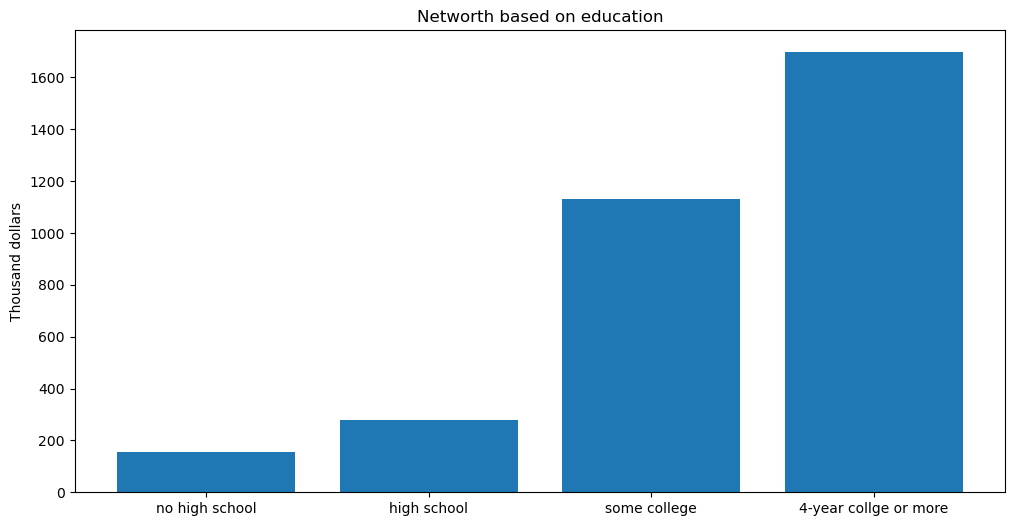

In [9]:
# Task 2
# net worth= assets-debt
import numpy as np
import matplotlib.pyplot as plt

#find for education level 0:


#find for education lvl 1:
e_1=df[(df['educ']==1)]

networth_1=[]
#creates a for loop for the 2 educ level 
for i in range (len(e_1)):
    networth_1.append(e_1['networth'].iloc[i])

avg_networth_1=np.mean(networth_1)





#find for education lvl 2:
e_2=df[(df['educ']==2)]

networth_2=[]
#creates a for loop for the 2 educ level 
for i in range (len(e_2['networth'])):
    networth_2.append(e_2['networth'].iloc[i])

avg_networth_2=np.mean(networth_2)
#plot





#find for education lvl 3:
e_3=df[(df['educ']==3)]

networth_3=[]

for i in range(len(e_3)):
    networth_3.append(e_3['networth'].iloc[i])

avg_networth_3=np.mean(networth_3)



#find the 4.th educ lvl

e_4=df[(df['educ']==4)]

networth_4=[]
#creates a for loop for the 2 educ level 
for i in range (len(e_4)):
    networth_4.append(e_4['networth'].iloc[i])

avg_networth_4=np.mean(networth_4)



#plot

fig, axes=plt.subplots(1,1, figsize = (12,6))
networth=[avg_networth_1, avg_networth_2, avg_networth_3, avg_networth_4]
education=['no high school','high school','some college','4-year collge or more']

axes.bar(education,networth)
axes.set_ylabel('Thousand dollars')
axes.set_title('Networth based on education')




In [10]:
e_4['networth'] # this is how i find the correct way

8        126.6919
9        126.6919
28       384.4102
35       302.2622
36       207.5026
          ...    
5802      40.9200
5804     747.4000
5805    7354.7600
5806    3229.0000
5807     818.1000
Name: networth, Length: 1755, dtype: float64

In [11]:
### Solution 3

from matplotlib.dates import YearLocator


print('Year-Avg networth')
avarage_networth=[]
years=[]
i=0

while i<len(df) and df['year'].iloc[i]<=2022:
    n_worth= []
    #current_year=df['year'].iloc[i]
    n_worth.append(df['networth'].iloc[i])
    
    while i+1<len(df) and (df['year'].iloc[i])==(df['year'].iloc[i+1]):
        i=i+1
        n_worth.append(df['networth'].iloc[i])
    print(df['year'].iloc[i], (np.mean(n_worth)).round(2))   
    
    avarage_networth.append(np.mean(n_worth))
    years.append(df['year'].iloc[i])

    i=i+1


Year-Avg networth
1989 891.38
1992 387.89
1995 491.6
1998 922.91
2001 517.78
2004 728.19
2007 1494.03
2010 615.88
2013 920.09
2016 902.96
2019 746.72
2022 2492.88


Text(0, 0.5, 'Thousand dollars')

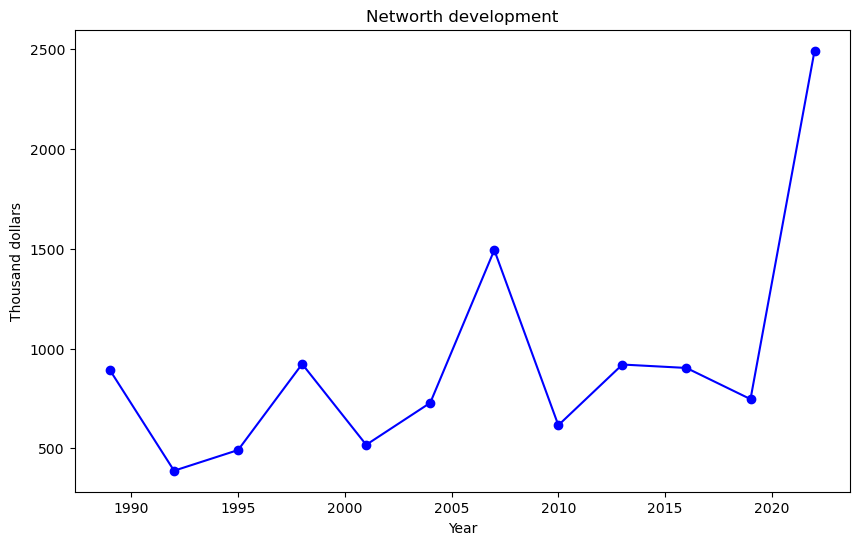

In [12]:
avarage_networth=[]
years=[]
i=0

while i<len(df) and df['year'].iloc[i]<=2022:
    n_worth= []
    #current_year=df['year'].iloc[i]
    n_worth.append(df['networth'].iloc[i])
    
    while i+1<len(df) and (df['year'].iloc[i])==(df['year'].iloc[i+1]):
        i=i+1
        n_worth.append(df['networth'].iloc[i])
        
    
    avarage_networth.append(np.mean(n_worth))
    years.append(df['year'].iloc[i])

    i=i+1

    

#n_worth=np.mean(n_worth)

#print(f'{n_worth} is avg networt in {df['year'].iloc[year]}')


fig, axes = plt.subplots(1,1, figsize=(10,6))

axes.plot(years, avarage_networth,color='blue', marker= 'o')
axes.set_title('Networth development')
axes.set_xlabel('Year')
axes.set_ylabel('Thousand dollars')

In [13]:
df[(df['educ']==3)]

,id,year,age,educ,networth,college
29,30,1989,30,3,26.9062,1
30,31,1989,30,3,26.9062,1
32,33,1989,36,3,327.0703,1
34,35,1989,26,3,-34.9296,1
46,47,1989,35,3,109.5153,1
...,...,...,...,...,...,...
5796,5797,2022,32,3,-5.0000,1
5797,5798,2022,43,3,402.2500,1
5799,5800,2022,54,3,162.5000,1
5800,5801,2022,54,3,162.5000,1


Text(0.5, 1.0, 'Networth development based on level of education')

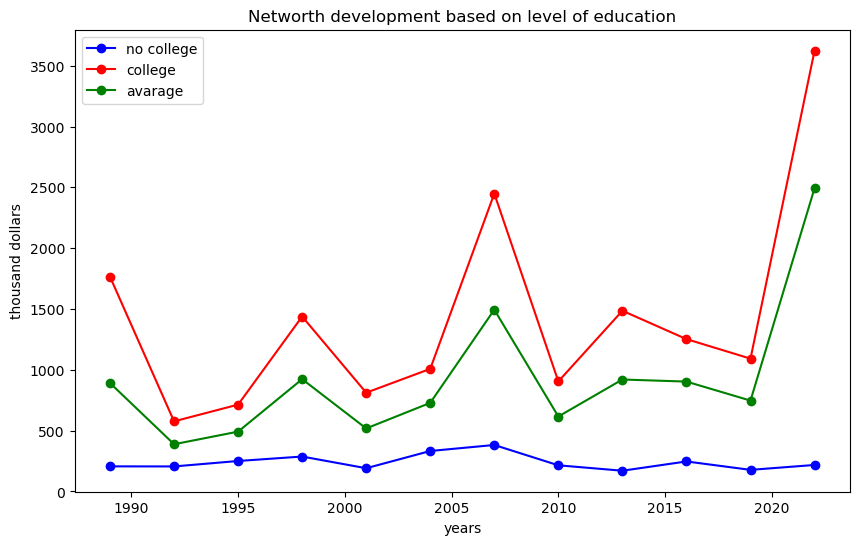

In [33]:

avg_n_college=[]
avg_college=[]
years=[]

i=0

while i<len(df) and df['year'].iloc[i]<=2022:
    ncollege=[]
    college=[] 


    if df['college'].iloc[i]==0:
        ncollege.append(df['networth'].iloc[i])
    else: #else, its 1->college
        college.append(df['networth'].iloc[i])

    while i+1<len(df) and (df['year'].iloc[i])==(df['year'].iloc[i+1]):
        i=i+1

        if df['college'].iloc[i]==0:
            ncollege.append(df['networth'].iloc[i])
        else: #else, its 1->college
            college.append(df['networth'].iloc[i]) 
        
   
    avg_n_college.append(np.mean(ncollege))
    avg_college.append(np.mean(college))
    years.append(df['year'].iloc[i])

    i=i+1

fig, axes= plt.subplots(1,1,figsize=(10,6))  
axes.plot(years, avg_n_college, 'b', marker='o', label='no college')      
axes.plot(years, avg_college, 'r', marker='o', label='college')
axes.plot(years, avarage_networth, color='green', marker='o', label='avarage')
axes.legend()
axes.set_xlabel('years')
axes.set_ylabel('thousand dollars')
axes.set_title('Networth development based on level of education')

## Hints

-   The assignment can be solved using the concepts we covered up to and including lecture/workshop 3 on Friday, October 10. 
-   In particular, you don't need `groupby()` which we'll cover later in the course, but you can instead loop over education levels or years, as needed.

***
**WRITE YOUR SOLUTION TO PARTS 1-4 HERE**

***
# Data description

## Variables

| Variable         | Description |
|------------------|-------------|
| id               | Identifier  |
| year             | Survey year |
| age             | Age of reference person (household head) |
| educ            | Education of reference person (1 = no high school/GED, 2 = high school or GED, 3 = some college or Assoc. degree, 4 = Bachelors degree or higher)|
| networth        | Net worth in US dollars |

## Reference

- URL: https://www.federalreserve.gov/econres/scfindex.htm
- DOI Identifier: https://doi.org/10.17016/8799
- Creator: Board of Governors of the Federal Reserve Board
- Name: 2022 Survey of Consumer Finances
- Description:
    The Survey of Consumer Finances (SCF) is normally a triennial cross-sectional survey of U.S. families. The survey data include information on families' balance sheets, pensions, income, and demographic characteristics.
- Publisher: Board of Governors of the Federal Reserve System
- Publication Year: 2023 